In [78]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import time
# 記錄開始時間
start_time = time.time()

train_data = pd.read_csv('adult.data', header= None, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])
test_data = pd.read_csv('adult.test', header= None, skiprows=1,  names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])


od = test_data

#編號與特徵無關
train_data = train_data.drop(['fnlwgt'], axis=1)
test_data = test_data.drop(['fnlwgt'], axis=1)

#education與education-num相對應(重複)，故刪除。
train_data.drop(['education'], axis = 1, inplace = True)
test_data.drop(['education'], axis = 1, inplace = True)

# 每個元素的前後空格去掉
train_data = train_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
test_data = test_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

#查看各欄"?"各數
# train_data.apply(lambda x: np.sum(x == "?"))
# test_data.apply(lambda x: np.sum(x == "?"))

#把"?"取代為NaT
train_data.replace("?", pd.NaT, inplace = True)
test_data.replace("?", pd.NaT, inplace = True)


# #將缺失值補齊，名目資料填眾數，數值資料填平均值。
fill_data = {'workclass': train_data['workclass'].mode()[0], 'occupation': train_data['occupation'].mode()[0], 'native-country': train_data['native-country'].mode()[0]}
fill_data_test = {'workclass': test_data['workclass'].mode()[0], 'occupation': test_data['occupation'].mode()[0], 'native-country': test_data['native-country'].mode()[0]}

#缺失值填充
train_data.fillna(fill_data, inplace=True)
test_data.fillna(fill_data_test, inplace=True)

#將income欄位>50K改為1，<=50K改為0
train_data['income'] = train_data['income'].apply(lambda x: 0 if x == "<=50K" else 1)
test_data['income'] = test_data['income'].apply(lambda x: 0 if x == '<=50K.' else 1)


# train_data.describe()
train_data

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [79]:
from sklearn import preprocessing
from scipy.stats import zscore
numerical_columns = ['age', 'education-num', 'capital-gain', 'capital-loss']
train_data[numerical_columns] = train_data[numerical_columns].apply(zscore)
test_data[numerical_columns] = test_data[numerical_columns].apply(zscore)

train_data

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.030671,State-gov,1.134739,Never-married,Adm-clerical,Not-in-family,White,Male,0.148453,-0.21666,40,United-States,0
1,0.837109,Self-emp-not-inc,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145920,-0.21666,13,United-States,0
2,-0.042642,Private,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145920,-0.21666,40,United-States,0
3,1.057047,Private,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145920,-0.21666,40,United-States,0
4,-0.775768,Private,1.134739,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145920,-0.21666,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,Private,0.746039,Married-civ-spouse,Tech-support,Wife,White,Female,-0.145920,-0.21666,38,United-States,0
32557,0.103983,Private,-0.420060,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.145920,-0.21666,40,United-States,1
32558,1.423610,Private,-0.420060,Widowed,Adm-clerical,Unmarried,White,Female,-0.145920,-0.21666,40,United-States,0
32559,-1.215643,Private,-0.420060,Never-married,Adm-clerical,Own-child,White,Male,-0.145920,-0.21666,20,United-States,0


In [80]:
# 使用pandas的get_dummies函數執行獨熱編碼
train_data = pd.get_dummies(train_data, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'], dtype=int)


test_data = pd.get_dummies(test_data, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'], dtype=int)

#在讀熱編碼後會依照有名目之欄位產生資料，train_data比test_data多出了該欄位，故將test_data新增該欄位，讓兩個資料集欄位相同。
test_data['native-country_Holand-Netherlands'] = 0

#刪除重複列
train_data.drop_duplicates(inplace=True)
test_data.drop_duplicates(inplace=True)

#將資料隨機化
# from sklearn.utils import shuffle
# train_data = shuffle(train_data)

train_data.describe()


,age,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
count,28970.000000,28970.000000,28970.000000,28970.000000,28970.000000,28970.000000,28970.000000,28970.000000,28970.000000,28970.000000,...,28970.000000,28970.000000,28970.000000,28970.000000,28970.000000,28970.000000,28970.000000,28970.000000,28970.000000,28970.000000
mean,0.051229,0.007805,0.016975,0.025546,40.652054,0.247843,0.032654,0.070349,0.000242,0.729375,...,0.001277,0.003935,0.000414,0.002761,0.001760,0.000621,0.000656,0.903521,0.002313,0.000552
std,1.003132,1.029122,1.055455,1.054415,12.748275,0.431767,0.177734,0.255738,0.015543,0.444290,...,0.035715,0.062608,0.020349,0.052478,0.041921,0.024919,0.025602,0.295252,0.048036,0.023495
min,-1.582206,-3.529656,-0.145920,-0.216660,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.775768,-0.420060,-0.145920,-0.216660,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,-0.042642,-0.031360,-0.145920,-0.216660,40.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.690484,1.134739,-0.145920,-0.216660,45.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3.769612,2.300838,13.394578,10.593507,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
# from sklearn.preprocessing import MinMaxScaler
# # 提取出數值特徵欄位
# numerical_columns = ['age', 'education-num', 'capital-gain', 'capital-loss']

# scaler = MinMaxScaler()

# #提取個別特徵欄位之數值，並計算該欄位之max與min，並把該欄位依照該max、min值重新scale至[0,1]
# train_data_scaled = pd.DataFrame(scaler.fit_transform(train_data[numerical_columns]), columns=numerical_columns)
# train_data[numerical_columns] = train_data_scaled

# #提取個別特徵欄位之數值，並計算該欄位之max與min，並把該欄位依照該max、min值重新scale至[0,1]
# test_data_scaled = pd.DataFrame(scaler.transform(test_data[numerical_columns]), columns=numerical_columns)
# test_data[numerical_columns] = test_data_scaled

# train_data.describe()


In [82]:
from xgboost import XGBRegressor

XGB = XGBRegressor()

# 從train_data中提取所有特徵，排除 'hours-per-week'
# X_train是特徵
X_train = train_data.drop('hours-per-week', axis=1)

#將欄位重新排序
X_train = X_train.sort_index(axis=1)

# 提取目標變量 'hours-per-week'
y_train = train_data['hours-per-week']

x_test = test_data.drop('hours-per-week', axis=1)

#將欄位重新排序
x_test = x_test.sort_index(axis=1)

y_test = test_data['hours-per-week']

XGB.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [83]:
y_pred = XGB.predict(x_test)

In [84]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

mape = mean_absolute_percentage_error(y_test, y_pred)
print("mean_absolute_percentage_error:", mape)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 121.83030655124863
mean_absolute_percentage_error: 0.31707035905504116
Root Mean Squared Error (RMSE): 11.03767668267415
R-squared (R2): 0.24723070326518637


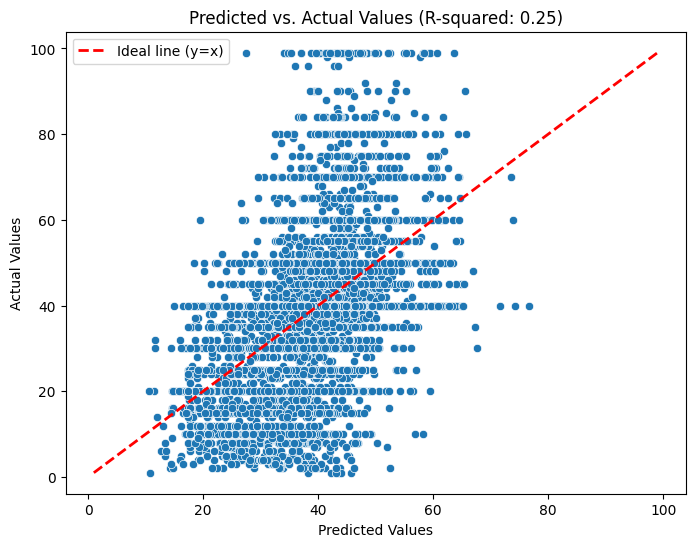

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal line (y=x)')
plt.title(f'Predicted vs. Actual Values (R-squared: {r2:.2f})')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend()
plt.show()

In [86]:
# 計算執行時間
elapsed_time = time.time() - start_time

print(f"執行時間: {elapsed_time} 秒")

執行時間: 1.9399466514587402 秒
